<a href="https://colab.research.google.com/github/kumar-shivang/Machine-Learning/blob/main/Week_1_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**: 

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [252]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [253]:
# Enter your solution here
X.shape[0]

100

## Problem-2

How many features does the dataset have?

In [254]:
# Enter your solution here
X.shape[1]

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library. 

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

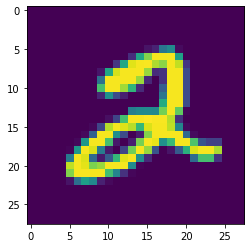

In [255]:
# Enter your solution here
import matplotlib.pyplot as plt
face_1 = X[0]
face_1 = face_1.reshape([28,28])
plt.imshow(face_1)
plt.show()

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [256]:
# Enter your solution here
X_mean = np.mean(X,axis=0)
X_center = X - X_mean
X_center.shape
sqr_sum = 0
for i in range(100):
  for j in range(784):
    sqr_sum += X_center[i][j]**2
print(sqr_sum**0.5/78400)
# 2nd approach
print((np.sum(X_center**2)**0.5)/78400)

0.23242174456564954
0.23242174456564685


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [257]:
# Enter your solution here
X = X_center
C = np.cov(X.T) #using inbuilt method
C2 = X.T@X/100 #using mathematical method
print(C.shape,C2.shape)
print((np.sum(C**2)**0.5)/784**2)
print((np.sum(C2**2)**0.5)/784**2)

(784, 784) (784, 784)
1.3785920211345706
1.3648061009232249


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [258]:
# Enter your solution here
eigval,eigvec = np.linalg.eig(C2)
eigval = eigval.astype(float)
eigvec = eigvec.astype(float)
print(np.linalg.norm(np.sum(eigvec[:2],axis=0)))

1.4142135623730951


<ipython-input-258-e61947a74ce8>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eigval = eigval.astype(float)
<ipython-input-258-e61947a74ce8>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  eigvec = eigvec.astype(float)


## Problem-7

Visualize the first principal component as an image.

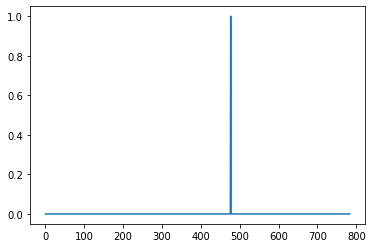

In [259]:
# Enter your solution here
# print(eigonvectors[0])
# plt.imshow(eigvec[0].reshape((28,28)))
plt.plot(eigvec[0])
plt.show()

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [267]:
# Enter your solution here
def first_k_PC(eigonvalues,accuracy):
  eigon_sum = eigonvalues.sum()
  # print(eigon_sum)
  k = 0
  sum_till_k = 0
  for ev in eigonvalues:
    if sum_till_k/eigon_sum<=accuracy/100:
      k+=1
      sum_till_k+=ev
      # print(k,sum_till_k)
    else:
      return k


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



[link text](https://)## for 20% variance

In [268]:
variance95 = first_k_PC(eigval,95)
print(variance95)

53


So first 2 eigonvectors capture 20% variance. So let's take first two eigoinvectors project the data point on each and sum and plot it.

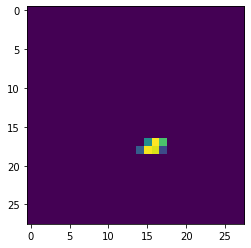

In [270]:
w1 = eigvec[0]
w2 = eigvec[1]
x1 = X_test[0].reshape((784,))
x_proj = np.zeros((784,))
for w_i in eigvec[:53]:
  x_proj=np.add(x_proj,(x1@w_i)*w_i)
img = x_proj.reshape((28,28))
plt.imshow(img)
plt.show()

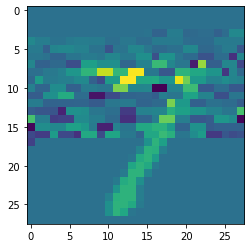

In [271]:
w1 = eigvec[0]
w2 = eigvec[1]
x1 = X_test[0].reshape((784,))
x_proj = np.zeros((784,))
for w_i in eigvec[:784]:
  x_proj=np.add(x_proj,(x1@w_i)*w_i)
img = x_proj.reshape((28,28))
plt.imshow(img)
plt.show()
